In [115]:
import numpy as np
from numpy.random import normal
from random import randint

from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt

In [116]:
max_len = 10
N = 100

def genRandomBlobs1d(range_max, l_max):
    split = []
    curr = 0
    while range_max-curr > max_len:
        next_interval = randint(1, max_len)
        noise = normal(0,0.5,1)
        split.append(next_interval+noise)
        curr += next_interval
    tail = range_max-curr
    noise = normal(0,0.5,1)
    split.append(tail+noise)
    return np.array(split)


def genRandomBlobs2d(range_max, l_max):
    split = []
    curr = 0
    while range_max-curr > max_len:
        next_interval = randint(1, max_len)
        noise = normal(0,0.5,2)
        split.append([next_interval+noise[0], next_interval+noise[1]])
        curr += next_interval
    tail = range_max-curr
    split.append([tail, tail])
    return np.array(split)


def assignSomeLabels(X):
    labels=[]
    for x,y in X:
        if x > 0.5 and y > 0.5:
            lab = 3
        elif x > 0.5 and y < 0.5:
            lab = 2
        elif x <= 0.5 and y > 0.5:
            lab = 1
        else:
            lab = 0
        labels.append(lab)
        
    return np.array(labels)

def plotDBSCAN_1d(X1d, db):
    L1d = len(X1d)
    labels = db.labels_

    # Number of clusters in labels, ignoring noise if present.
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise_ = list(labels).count(-1)

    print("Estimated number of clusters: %d" % n_clusters_)
    print("Estimated number of noise points: %d" % n_noise_)

    unique_labels = set(labels)
    core_samples_mask = np.zeros_like(labels, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True

    unique_labels = set(labels)
    print(unique_labels)
    core_samples_mask = np.zeros_like(labels, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True

    colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Black used for noise.
            col = [0, 0, 0, 1]

        class_member_mask = labels == k
        xs=np.array(range(L1d))[class_member_mask & core_samples_mask]
        xy = X1d[class_member_mask & core_samples_mask]
        plt.scatter(x=xs, y=xy, color=col, s=80)

        xs=np.array(range(L1d))[class_member_mask & ~core_samples_mask]
        xy = X1d[class_member_mask & ~core_samples_mask]
        plt.scatter(x=xs, y=xy, color=col, s = 20)


    plt.title(f"Estimated number of clusters: {n_clusters_}")
    plt.show()

    
def plotDBSCAN_2d(X2d, db):
    labels = db.labels_

    # Number of clusters in labels, ignoring noise if present.
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise_ = list(labels).count(-1)

    print("Estimated number of clusters: %d" % n_clusters_)
    print("Estimated number of noise points: %d" % n_noise_)

    unique_labels = set(labels)
    core_samples_mask = np.zeros_like(labels, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True

    colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Black used for noise.
            col = [0, 0, 0, 1]

        class_member_mask = labels == k

        xy = X2d[class_member_mask & core_samples_mask]
        plt.plot(
            xy[:, 0],
            xy[:, 1],
            "o",
            markerfacecolor=tuple(col),
            markeredgecolor="k",
            markersize=14,
        )

        xy = X2d[class_member_mask & ~core_samples_mask]
        plt.plot(
            xy[:, 0],
            xy[:, 1],
            "o",
            markerfacecolor=tuple(col),
            markeredgecolor="k",
            markersize=6,
        )

    plt.title(f"Estimated number of clusters: {n_clusters_}")
    plt.show()


In [117]:
#
# generate using a hand-made genRandomBlobs2d
#

X2d = genRandomBlobs2d(1000, l_max=5)
db = DBSCAN(eps=0.6, min_samples=10).fit(X2d)

Estimated number of clusters: 4
Estimated number of noise points: 38


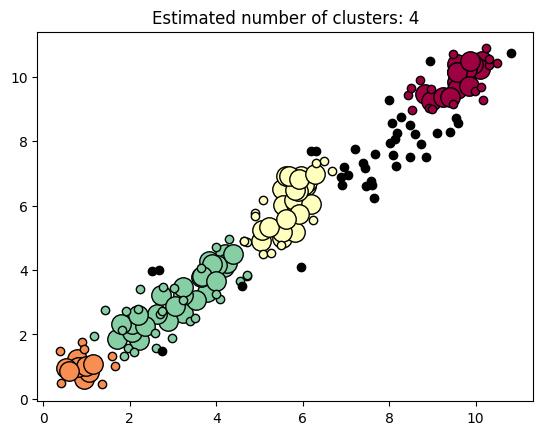

In [118]:
plotDBSCAN_2d(X2d, db)

In [119]:
#
# generate using a hand-made genRandomBlobs1d
#

N1d = 1000
X1d = genRandomBlobs1d(N1d, l_max=5)
db = DBSCAN(eps=0.6**2, min_samples=15).fit(X1d)

Estimated number of clusters: 2
Estimated number of noise points: 107
{0, 1, -1}


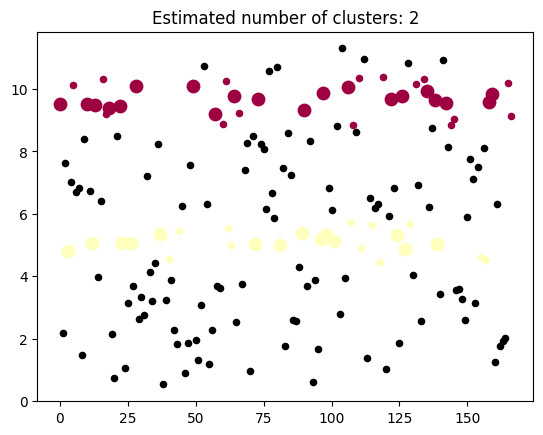

In [120]:
plotDBSCAN_1d(X1d, db)

In [123]:
#
# Using make_blobs n_features = 1
#

N_make_blobs=300

Y, labels_true = make_blobs(n_samples=N_make_blobs, centers=3, n_features=1, random_state=0)
#plt.scatter(x=range(N_make_blobs), y = Y)

Estimated number of clusters: 4
Estimated number of noise points: 115
{0, 1, 2, 3, -1}


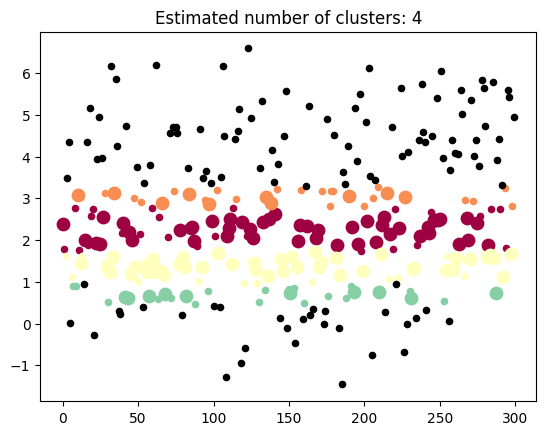

In [124]:
db = DBSCAN(eps=0.15, min_samples=20).fit(Y)

labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

unique_labels = set(labels)
print(unique_labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k
    xs=np.array(range(NN))[class_member_mask & core_samples_mask]
    xy = Y[class_member_mask & core_samples_mask]
    plt.scatter(x=xs, y=xy, color=col, s=80)
    
    xs=np.array(range(NN))[class_member_mask & ~core_samples_mask]
    xy = Y[class_member_mask & ~core_samples_mask]
    plt.scatter(x=xs, y=xy, color=col, s = 20)

    
plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.show()
